In [6]:
from PIL import Image 
import os
from ultralytics import YOLO 
import matplotlib.pyplot as plt
import cv2
import random 

image_paths = ["./train/images/", "./valid/images/", "./test/images/"]

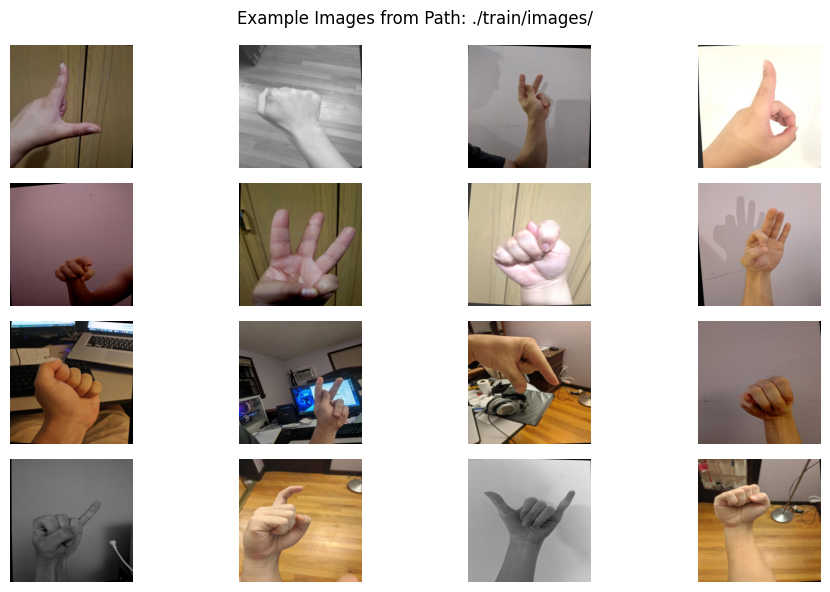

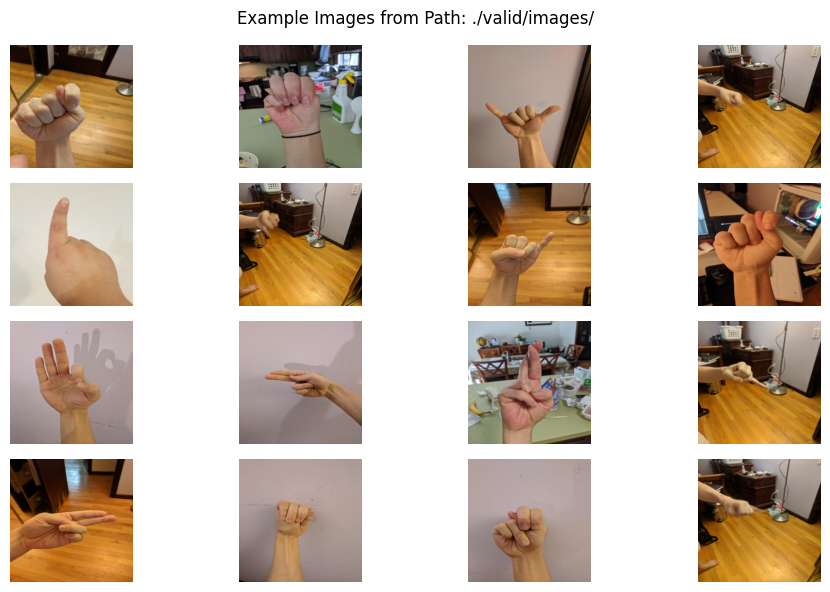

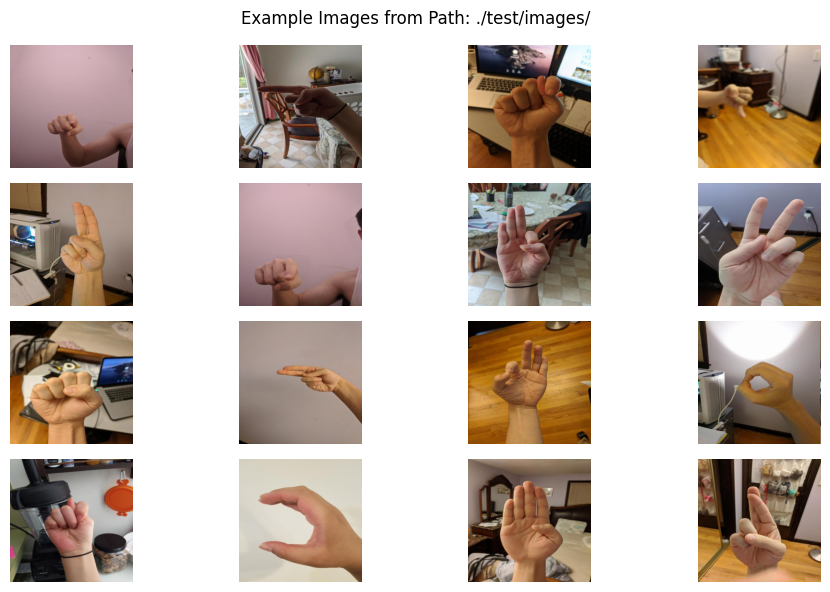

In [7]:
# Plot 16 random Images for every image_path

for image_path in image_paths:
    image_files = [file for file in os.listdir(image_path) if file.endswith(".jpg")]

    selected_images = random.sample(image_files, 16)

    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 6))

    for ax, img_file in zip(ax.ravel(), selected_images):
        img_path = os.path.join(image_path, img_file)
        image = Image.open(img_path)
        ax.imshow(image)
        ax.axis("off")

    plt.suptitle(f"Example Images from Path: {image_path}", fontsize=12)
    plt.tight_layout()
    plt.show()

In [8]:
# Check Number of Images and Image Sizes

for image_path in image_paths:
    images = 0
    image_sizes = set()

    for filename in os.listdir(image_path):
        if filename.endswith(".jpg"):
            images += 1
            full_image_path = os.path.join(image_path, filename) 
            with Image.open(full_image_path) as img:
                image_sizes.add(img.size)
    
    print(f"Number of images in {image_path}: {images}")

    if len(image_sizes) == 1:
        print(f"All training images in {image_path} have the same size: {image_sizes.pop()}\n\n")
    else:
        print(f"Images in {image_path} have varying sizes!\n\n")

Number of images in ./train/images/: 1512
Images in ./train/images/ have varying sizes!


Number of images in ./valid/images/: 144
All training images in ./valid/images/ have the same size: (416, 416)


Number of images in ./test/images/: 72
All training images in ./test/images/ have the same size: (416, 416)




In [9]:
# Create YOLO V11 Nano Model

model = YOLO("yolo11n.pt")


image 1/1 /home/ubuntu/dev/yolov11-asl/train/images/A0_jpg.rf.292a080422ba984985192f413101af41.jpg: 640x640 1 person, 1 cat, 1 dog, 1 cup, 2 laptops, 1 keyboard, 5.0ms
Speed: 2.3ms preprocess, 5.0ms inference, 71.0ms postprocess per image at shape (1, 3, 640, 640)


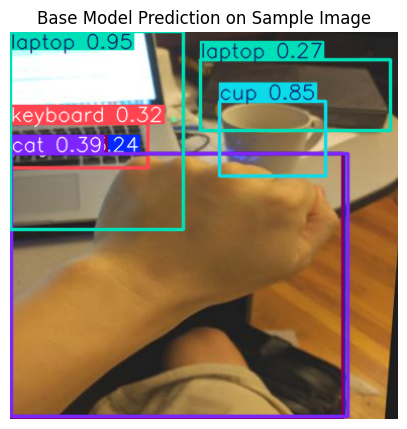

In [10]:
# Does the Model detect anything?

sample_image_path = "./train/images/A0_jpg.rf.292a080422ba984985192f413101af41.jpg"

results = model.predict(source=sample_image_path, imgsz=640, conf=0.2)
sample_image = results[0].plot(line_width=2)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 10))
plt.imshow(sample_image)
plt.title("Base Model Prediction on Sample Image", fontsize=12)
plt.axis("off")
plt.show()